## 웹크롤링 & 텍스트데이터 분석(3) 워드클라우드

라이브러리

In [1]:
import nltk

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_excel('result_210623_1312.xlsx', encoding = 'utf-8')
df.head()

,Title,Date,Article,URL,PressCompany
0,"[인터뷰 종합]""'여고괴담' 코인 기대해""…김형서, '뮤지션 비비'와 배우의 두 얼굴",2021.06.22. 오후 3:55,김형서(23)가 '뮤지션 비비'가 아닌 배우 타이틀에 용기 있게 도전했다.기억을 잃...,https://news.naver.com/main/read.nhn?mode=LSD&...,스포츠조선
1,"비비 ""롤모델? 박찬욱 감독…박정민, 내가 대본 쓴 MV에 캐스팅하고파"" [MD인터뷰③]",2021.06.22. 오후 2:29,신예 김형서(활동명 비비(BIBI)·22)가 롤모델로 박찬욱 감독을 지목하며 배우...,https://news.naver.com/main/read.nhn?mode=LSD&...,마이데일리
2,"배우 이제훈, 매니지먼트 컴퍼니온 설립 [공식]",2021.06.21. 오전 9:17,배우 이제훈이 매니지먼트 컴퍼니온을 설립하며 새로운 시작을 알렸다.컴퍼니온 측은 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,이데일리
3,배우 이제훈 매니지먼트 사업 뛰어든다,2021.06.21. 오전 9:41,"니온 설립, 다양한 활동 예고 \n배우 이제훈이 매니지먼트 사업을 시작한다. 21일...",https://news.naver.com/main/read.nhn?mode=LSD&...,아시아경제
4,김혜수·조인성·염정아·박정민… 류승완 감독 신작 '밀수' 크랭크인(공식),2021.06.11. 오전 9:37,"은 바다에서 펼쳐지는 위험천만한 밀수 작전을 그려낼 영화 '밀수'가 김혜수, 염정아...",https://news.naver.com/main/read.nhn?mode=LSD&...,YTN


In [4]:
df.Article

0     김형서(23)가 '뮤지션 비비'가 아닌 배우 타이틀에 용기 있게 도전했다.기억을 잃...
1      신예 김형서(활동명 비비(BIBI)·22)가 롤모델로 박찬욱 감독을 지목하며 배우...
2      배우 이제훈이 매니지먼트 컴퍼니온을 설립하며 새로운 시작을 알렸다.컴퍼니온 측은 ...
3     니온 설립, 다양한 활동 예고 \n배우 이제훈이 매니지먼트 사업을 시작한다. 21일...
4     은 바다에서 펼쳐지는 위험천만한 밀수 작전을 그려낼 영화 '밀수'가 김혜수, 염정아...
5     철 “어릴 때부터 흥부자, 배우 꿈꿔왔다” [화보]드라마 <빈센조>, <라켓소년단>...
6      박정민 © News1 김진환 기자(서울=뉴스1) 안태현 기자 = 배우 박정민이 운...
7     울=뉴시스]2일 방송되는 tvN '유 퀴즈 온 더 블럭'. (사진=tvN '유 퀴즈...
8      영화 '밀수'(감독 류승완)가 배우 김혜수, 염정아, 조인성, 박정민, 고민시, ...
9      퀴즈 온 더 블럭' 2일 방송 \ntvN '유 퀴즈 온 더 블럭' 캡처 © 뉴스1...
10     배우 박정민이 꿈을 위해 학교를 옮긴 사연을 털어놨다.박정민은 2일 방송된 tvN...
11           울=뉴시스] 배우 박정민. (사진 = tvN '유 퀴즈 온 더 블럭' 캡처)
12    포츠경향]  \ntvN ‘유퀴즈’‘충무로 캐스팅 1순위’ 배우 박정민이 자격지심으로...
13     퀴즈 온 더 블럭' 2일 방송 \ntvN '유 퀴즈 온 더 블럭' 캡처 © 뉴스1...
14     배우 박정민부터 대기업 첫 여성 임원 윤여순까지, 포기를 모르는 도전으로 인생의 ...
15    배우 박정민이 선배 박원상에게 감사 인사를 전했다.지난 2일 방송된 tvN 예능 프...
16     '기적' 온라인 제작보고회 \n[서울=뉴시스]26일 오후 4시 온라인으로 진행된 ...
17    적' 포스터 © 뉴스1(서울=뉴스1) 정유진 기자 = 배우 박정민, 이성민,

In [5]:
# string -> list
s = 'python is easy'
result = s.split()
print(result)

['python', 'is', 'easy']


In [6]:
# list -> string
result2 = '_'.join(result)
print(result2)

python_is_easy


In [7]:
# 각각의 기사 본문(Article) -> 리스트
articles = df.Article.tolist() # series -> list

In [8]:
# 하나의 문자열로 변환
articles = ''.join(articles)
articles[:1000]

'김형서(23)가 \'뮤지션 비비\'가 아닌 배우 타이틀에 용기 있게 도전했다.기억을 잃은 채 모교의 교감으로 부임한 은희가 학교 내 문제아 학생을 하영을 만나 오랜 시간 비밀처럼 감춰진 화장실을 발견하게 되고 잃어버렸던 충격적인 기억의 실체를 마주하는 이야기를 그린 호러 영화 \'여고괴담 여섯번째 이야기: 모교\'(이하 \'모교\', 이미영 감독, 씨네2000 제작). 극중 의문의 학생 재연 역을 맡은 김형서가 22일 진행된 화상 인터뷰를 통해 작품에 대한 이야기를 전했다.SBS 음악 경연 프로그램 \'더 팬\'에서 준우승을 차지하고 직접 작업한 개성 있는 음악으로 팬들에게 가장 \'힙\'하고 트랜디한 음악을 선보여 온 뮤지션 비비. 최근 티빙 오리지널 예능 \'여고추리반\'과 유튜브 컨텐츠 \'워크맨\' 등을 통해서 엉뚱하면서도 솔직한 매력을 선보이며 눈길을 끌었던 그가 12년만에 돌아온 \'여고괴담\' 시리즈를 통해 \'배우 김형서\'로 천 선을 보였다.극중 그가 연기하는 재연은 기억을 잃은 은희(김서형)의 곁을 떠도는 의문의 학생. 늘 한쪽 실내화가 벗겨진 채로 은희 앞에 나타나는 그가 누구인지, 무슨 이유로 나타나는지 아무도 알지 못한다. 그러다 은희가 재연과 얽힌 자신의 잊혀졌던 기억을 조금씩 떠올리게 되고, 마침내 재연에 대한 비밀도 밝혀지기 시작한다. \n이날 김형서는 "저는 개봉이 영원히 안될 것 같았는데 개봉이 되서 너무 속이 시원하다. 가수분들이 배우 도전하시면 혹평을 들으시는 경우도 있지 않나. 그래서 더 긴장했던 것 같다"며 배우로서 첫 인터뷰를 갖게 된 소감을 전했다.이번 영화를 통해 연기에 도전하게 된 이유를 묻자 "연기는 굉장히 우연한 계기로 하게 됐다. 처음에는 제작사인 씨네2000에서 먼저 연락이 왔다. 특정인의 아역을 뽑는거라고 먼저 연락이 왔고 오디션을 보러 갔다. 배우 꿈이 없지는 않았다. 저는 그냥 모든 걸 다 해보고 싶어하는 스타일이다. 예체능쪽은 다 도전하고 싶었다. 그래서 도전해보게 됐다"고 말했다.그리고는 "그냥 


---

### 단어 정규화 및 어근화, 품사 태깅

#### 품사 태깅(tagging)

norm
- 정규화(normalization)
- 일반화된 문장으로 되돌려줌

예시) 한국어를 처리하는 예시입니닼ㅋㅋㅋ -> 한국어를 처리하는 예시입니다ㅋㅋ

stem
- 어근화(stemming)
- 사전형으로 되돌려줌

예시) 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하다Verb, 예시Noun, 이다Adjective, ㅋㅋKoreanParticle

---


라이브러리

In [9]:
from konlpy.tag import Okt

태깅 전 전처리

In [10]:
articles[:1000]

'김형서(23)가 \'뮤지션 비비\'가 아닌 배우 타이틀에 용기 있게 도전했다.기억을 잃은 채 모교의 교감으로 부임한 은희가 학교 내 문제아 학생을 하영을 만나 오랜 시간 비밀처럼 감춰진 화장실을 발견하게 되고 잃어버렸던 충격적인 기억의 실체를 마주하는 이야기를 그린 호러 영화 \'여고괴담 여섯번째 이야기: 모교\'(이하 \'모교\', 이미영 감독, 씨네2000 제작). 극중 의문의 학생 재연 역을 맡은 김형서가 22일 진행된 화상 인터뷰를 통해 작품에 대한 이야기를 전했다.SBS 음악 경연 프로그램 \'더 팬\'에서 준우승을 차지하고 직접 작업한 개성 있는 음악으로 팬들에게 가장 \'힙\'하고 트랜디한 음악을 선보여 온 뮤지션 비비. 최근 티빙 오리지널 예능 \'여고추리반\'과 유튜브 컨텐츠 \'워크맨\' 등을 통해서 엉뚱하면서도 솔직한 매력을 선보이며 눈길을 끌었던 그가 12년만에 돌아온 \'여고괴담\' 시리즈를 통해 \'배우 김형서\'로 천 선을 보였다.극중 그가 연기하는 재연은 기억을 잃은 은희(김서형)의 곁을 떠도는 의문의 학생. 늘 한쪽 실내화가 벗겨진 채로 은희 앞에 나타나는 그가 누구인지, 무슨 이유로 나타나는지 아무도 알지 못한다. 그러다 은희가 재연과 얽힌 자신의 잊혀졌던 기억을 조금씩 떠올리게 되고, 마침내 재연에 대한 비밀도 밝혀지기 시작한다. \n이날 김형서는 "저는 개봉이 영원히 안될 것 같았는데 개봉이 되서 너무 속이 시원하다. 가수분들이 배우 도전하시면 혹평을 들으시는 경우도 있지 않나. 그래서 더 긴장했던 것 같다"며 배우로서 첫 인터뷰를 갖게 된 소감을 전했다.이번 영화를 통해 연기에 도전하게 된 이유를 묻자 "연기는 굉장히 우연한 계기로 하게 됐다. 처음에는 제작사인 씨네2000에서 먼저 연락이 왔다. 특정인의 아역을 뽑는거라고 먼저 연락이 왔고 오디션을 보러 갔다. 배우 꿈이 없지는 않았다. 저는 그냥 모든 걸 다 해보고 싶어하는 스타일이다. 예체능쪽은 다 도전하고 싶었다. 그래서 도전해보게 됐다"고 말했다.그리고는 "그냥 

In [11]:
articles = articles.replace('(', '')
articles = articles.replace(')', '')
articles = articles.replace(' \n', '')
articles = articles.replace('\n', '')
articles = articles.replace('\'', '')
articles[:1000]

'김형서23가 뮤지션 비비가 아닌 배우 타이틀에 용기 있게 도전했다.기억을 잃은 채 모교의 교감으로 부임한 은희가 학교 내 문제아 학생을 하영을 만나 오랜 시간 비밀처럼 감춰진 화장실을 발견하게 되고 잃어버렸던 충격적인 기억의 실체를 마주하는 이야기를 그린 호러 영화 여고괴담 여섯번째 이야기: 모교이하 모교, 이미영 감독, 씨네2000 제작. 극중 의문의 학생 재연 역을 맡은 김형서가 22일 진행된 화상 인터뷰를 통해 작품에 대한 이야기를 전했다.SBS 음악 경연 프로그램 더 팬에서 준우승을 차지하고 직접 작업한 개성 있는 음악으로 팬들에게 가장 힙하고 트랜디한 음악을 선보여 온 뮤지션 비비. 최근 티빙 오리지널 예능 여고추리반과 유튜브 컨텐츠 워크맨 등을 통해서 엉뚱하면서도 솔직한 매력을 선보이며 눈길을 끌었던 그가 12년만에 돌아온 여고괴담 시리즈를 통해 배우 김형서로 천 선을 보였다.극중 그가 연기하는 재연은 기억을 잃은 은희김서형의 곁을 떠도는 의문의 학생. 늘 한쪽 실내화가 벗겨진 채로 은희 앞에 나타나는 그가 누구인지, 무슨 이유로 나타나는지 아무도 알지 못한다. 그러다 은희가 재연과 얽힌 자신의 잊혀졌던 기억을 조금씩 떠올리게 되고, 마침내 재연에 대한 비밀도 밝혀지기 시작한다.이날 김형서는 "저는 개봉이 영원히 안될 것 같았는데 개봉이 되서 너무 속이 시원하다. 가수분들이 배우 도전하시면 혹평을 들으시는 경우도 있지 않나. 그래서 더 긴장했던 것 같다"며 배우로서 첫 인터뷰를 갖게 된 소감을 전했다.이번 영화를 통해 연기에 도전하게 된 이유를 묻자 "연기는 굉장히 우연한 계기로 하게 됐다. 처음에는 제작사인 씨네2000에서 먼저 연락이 왔다. 특정인의 아역을 뽑는거라고 먼저 연락이 왔고 오디션을 보러 갔다. 배우 꿈이 없지는 않았다. 저는 그냥 모든 걸 다 해보고 싶어하는 스타일이다. 예체능쪽은 다 도전하고 싶었다. 그래서 도전해보게 됐다"고 말했다.그리고는 "그냥 영화를 찍어보고 싶다는 생각을 막연히 했었는데, 회사로 먼저 연락이 왔다. 처음에

품사 태깅

In [12]:
twitter = Okt()
raw_pos_tagged = twitter.pos(articles, norm = True, stem = True) # POS Tagging
raw_pos_tagged[:10] 

[('김형', 'Noun'),
 ('서', 'Josa'),
 ('23', 'Number'),
 ('가다', 'Verb'),
 ('뮤지션', 'Noun'),
 ('비비', 'Noun'),
 ('가', 'Josa'),
 ('아니다', 'Adjective'),
 ('배우', 'Noun'),
 ('타이틀', 'Noun')]

<br>

### 단어 등장 빈도 카운팅

In [13]:
# 무의미한 단어 리스트
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 
# append하여 커스텀 가능
del_list.append('김형')

word_cleaned = []
for word in raw_pos_tagged: #  ('서울', 'Noun'),
    
    # Foreign == ”, “ 와 같이 제외되어야할 항목들
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign", "Number"]: 
        if (len(word[0]) != 1) & (word[0] not in del_list):
            # 한 글자로 이뤄진 단어들을 제외(의미 없다고 가정) & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])
        
print(word_cleaned[:100])

['가다', '뮤지션', '비비', '배우', '타이틀', '용기', '도전', '기억', '잃다', '모교', '교감', '부임', '은희', '학교', '문제', '학생', '하영', '만나다', '오랜', '시간', '비밀', '감추다', '화장실', '발견', '잃어버리다', '충격', '기억', '실체', '마주', '이야기', '그린', '호러', '영화', '여고괴담', '여섯', '번째', '이야기', '모교', '이하', '모교', '이미영', '감독', '제작', '의문', '학생', '재연', '맡다', '가다', '진행', '화상', '인터뷰', '통해', '작품', '대한', '이야기', 'SBS', '음악', '경연', '프로그램', '준우승', '차지', '직접', '작업', '개성', '음악', '가장', '트랜디', '음악', '선보이다', '뮤지션', '비비', '최근', '티빙', '리지', '예능', '여고', '추리', '유튜브', '컨텐츠', '워크맨', '통해', '엉뚱하다', '솔직하다', '매력', '선보이다', '눈길', '끌다', '돌아오다', '여고괴담', '시리즈', '통해', '배우', '서로', '보이다', '연기', '재연', '기억', '잃다', '은희', '김서형']


리스트에 담긴 단어 개수 count

In [39]:
word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        # 처음 등장할 시
        word_dic[word] = 1
    else:
        # 추가 등장시 count ++
        word_dic[word] += 1

key_list = list(word_dic)[:10]
for key in key_list:
    print(key + ': '+ str(word_dic[key]))

가다: 34
뮤지션: 2
비비: 4
배우: 83
타이틀: 1
용기: 1
도전: 14
기억: 13
잃다: 8
모교: 7


Counter 라이브러리

In [40]:
from collections import Counter

result = Counter(word_cleaned)
word_dic = dict(result)

key_list = list(word_dic)[:10]
for key in key_list:
    print(key + ': '+ str(word_dic[key]))

가다: 34
뮤지션: 2
비비: 4
배우: 83
타이틀: 1
용기: 1
도전: 14
기억: 13
잃다: 8
모교: 7


<br>


### 워드클라우드 만들기

In [43]:
for key in key_list:
    print(key + ': '+ str(word_dic[key]))

가다: 34
뮤지션: 2
비비: 4
배우: 83
타이틀: 1
용기: 1
도전: 14
기억: 13
잃다: 8
모교: 7


lambda 함수를 활용하여 내림차순 정렬

In [56]:
sorted_word_dic = sorted(word_dic.items(), key = lambda x:x[1], reverse = True)

dic_to_list = list(sorted_word_dic)
for i in range(0, 15):
    print(dic_to_list[i])

('박정민', 96)
('배우', 83)
('영화', 68)
('연기', 47)
('싶다', 44)
('가다', 34)
('기적', 33)
('감독', 32)
('없다', 31)
('퀴즈', 30)
('생각', 27)
('통해', 26)
('블럭', 24)
('이야기', 23)
('사람', 23)


<br>

### 단어 등장 빈도 시각화

In [25]:
import nltk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # NanumGothic.otf
matplotlib.rc('font', family=font_name)

In [39]:
print(word_cleaned[:100])

['가다', '뮤지션', '비비', '배우', '타이틀', '용기', '도전', '기억', '잃다', '모교', '교감', '부임', '은희', '학교', '문제', '학생', '하영', '만나다', '오랜', '시간', '비밀', '감추다', '화장실', '발견', '잃어버리다', '충격', '기억', '실체', '마주', '이야기', '그린', '호러', '영화', '여고괴담', '여섯', '번째', '이야기', '모교', '이하', '모교', '이미영', '감독', '제작', '의문', '학생', '재연', '맡다', '가다', '진행', '화상', '인터뷰', '통해', '작품', '대한', '이야기', 'SBS', '음악', '경연', '프로그램', '준우승', '차지', '직접', '작업', '개성', '음악', '가장', '트랜디', '음악', '선보이다', '뮤지션', '비비', '최근', '티빙', '리지', '예능', '여고', '추리', '유튜브', '컨텐츠', '워크맨', '통해', '엉뚱하다', '솔직하다', '매력', '선보이다', '눈길', '끌다', '돌아오다', '여고괴담', '시리즈', '통해', '배우', '서로', '보이다', '연기', '재연', '기억', '잃다', '은희', '김서형']


꺾은선 차트 시각화

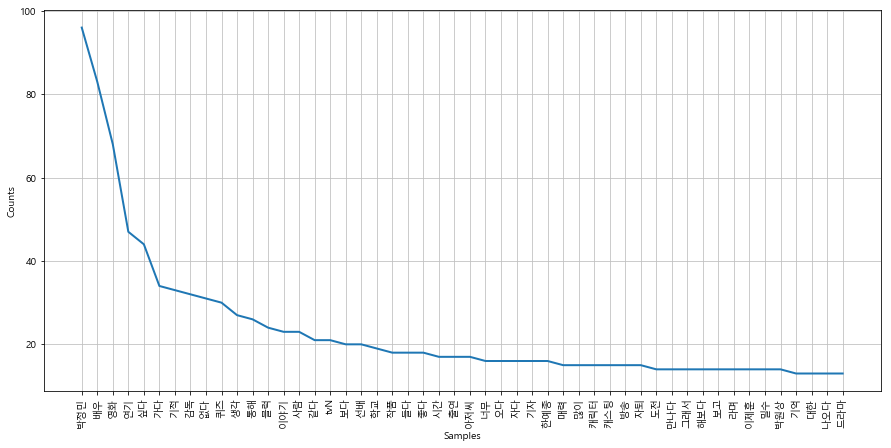

In [26]:
word_counted = nltk.Text(word_cleaned)
plt.figure(figsize=(15, 7))
word_counted.plot(50)

막대그래프

In [27]:
# 막대그래프로의 시각화는 NLTK 의 함수만으로 진행하기 어려우므로,
# NLTK의 FreqDist 함수를 적용한 후 Pandas의 Dataframe에 데이터를 담은 다음 시각화를 진행합니다.

word_frequency = nltk.FreqDist(word_cleaned) # Frequency Distribution
word_frequency

FreqDist({'박정민': 96, '배우': 83, '영화': 68, '연기': 47, '싶다': 44, '가다': 34, '기적': 33, '감독': 32, '없다': 31, '퀴즈': 30, ...})

In [28]:
# 1
# 단어 빈도가 담긴 Dict 로부터 값을 가져와 DataFrame 을 만듭니다.
# 단어(key): 수(value)
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys()) 

# 2
# 1) 2개의 열을 dict 형태로 묶어 DataFrame에 넣고 데이터프레임을 만든다
# 2) df.set_index('열 이름')dmfh index열 세팅

# 빈도 내림차순으로 정렬합니다.
result = df.sort_values([0], ascending=False)

# 전체 데이터(단어 수)는 너무 많기 때문에 출현 횟수 상위 50개만 가져와 시각화합니다.
result = result[:30]
result

result.head()

,0
박정민,96
배우,83
영화,68
연기,47
싶다,44


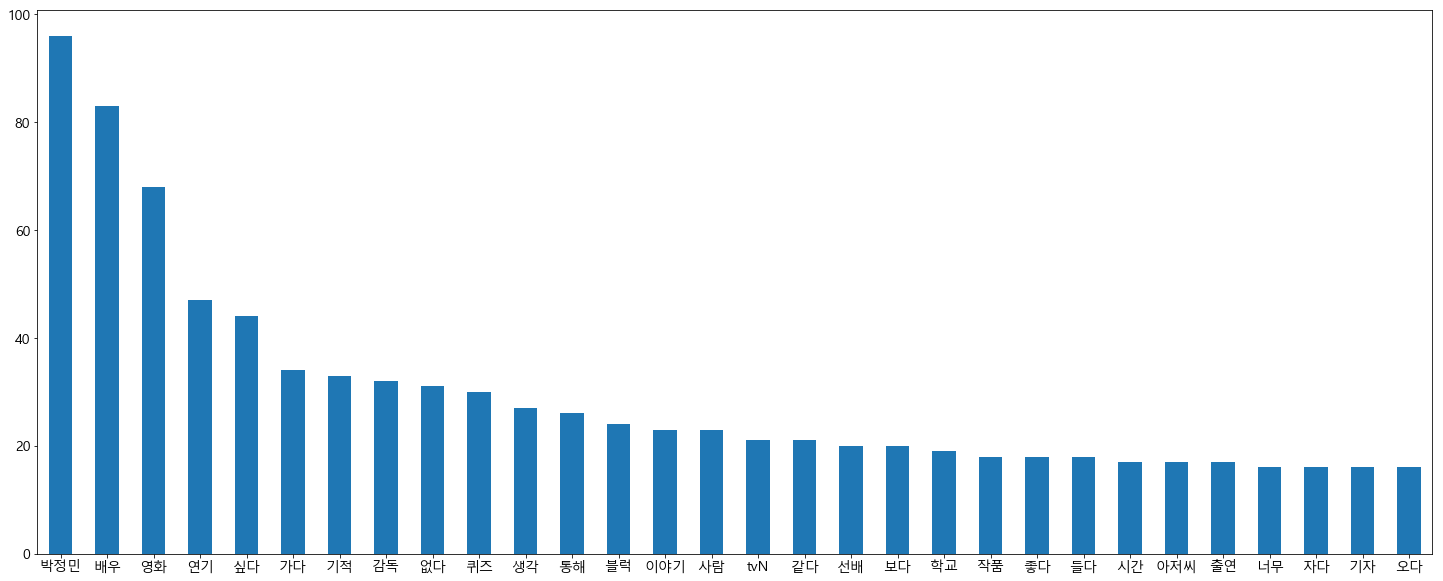

In [29]:
result.plot(kind = 'bar', legend = False, figsize = (25,10), rot=0, fontsize=14) # 'bar' graph
plt.show()

<br>

### 워드클라우드 만들기

In [30]:
from wordcloud import WordCloud
from PIL import Image 

워드클라우드 생성

In [31]:
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # 폰트설정
                       width=2000, height=1000, # 워드클라우드 크기(해상도)
                       prefer_horizontal= 0.8, # 가로방향 단어 비율 (0~1)
                       background_color='white',
                       colormap = 'Set2')

In [136]:
word_cloud.generate_from_frequencies(word_dic) # Generate wordcloud from word "frequency" data.

기본 워드클라우드

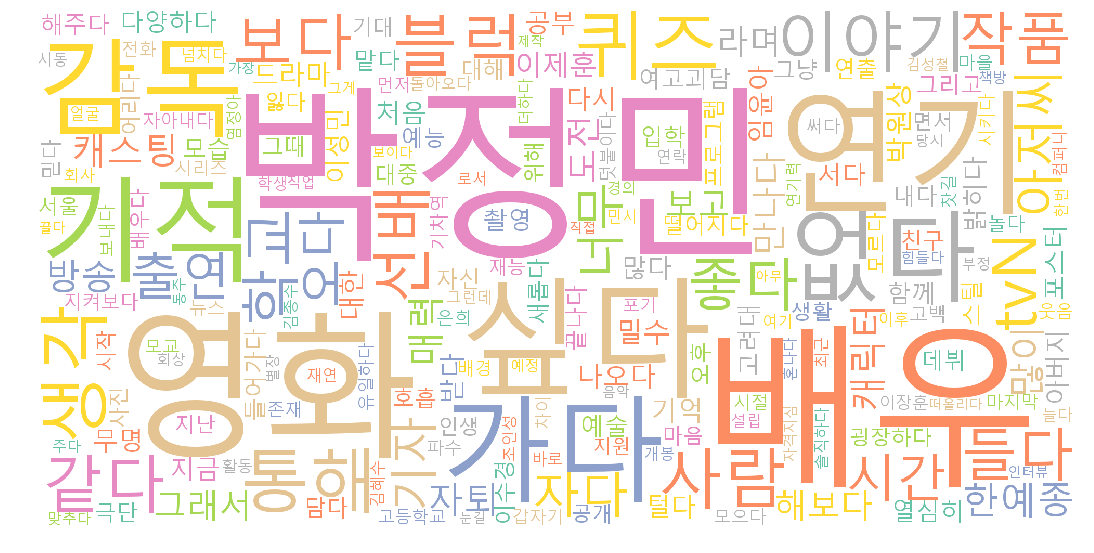

In [137]:
plt.figure(figsize=(15,15))
plt.imshow(word_cloud) # image show
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

최대 단어개수 설정

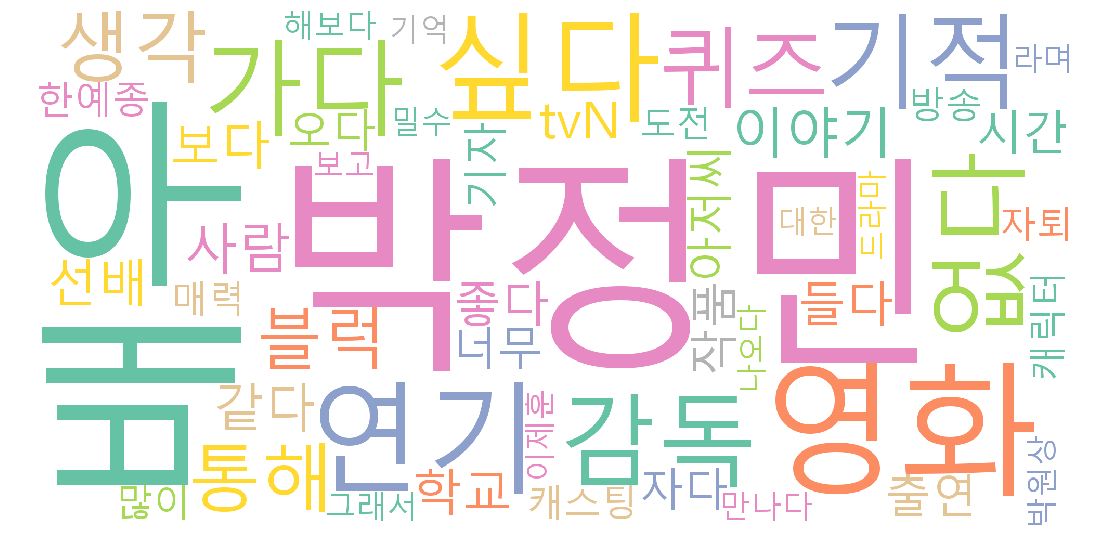

In [33]:
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", 
                       max_words=50, # max words
                       width=2000, height=1000, 
                       background_color='white',
                       colormap='Set2').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

바탕색 설정과 폰트 사이즈 설정

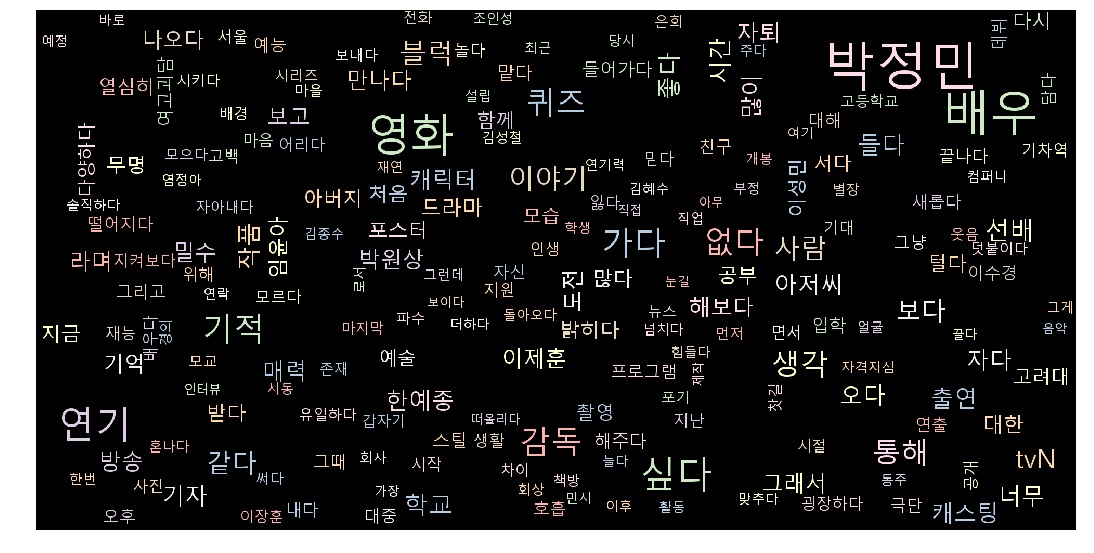

In [34]:
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, 
#                        background_color='white', 
#                        min_font_size=50,
                       max_font_size=100,
                       colormap='Pastel1').generate_from_frequencies(word_dic) # Max font-size

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

마스킹 적용 - 특정 그림 테두리 내에 워드클라우드 그리기)

In [35]:
from PIL import Image

(1024, 920)

In [43]:
cloud_shape = np.array(Image.open("image/wordcloud3.jpg"))
cloud_shape.shape

(915, 956, 3)

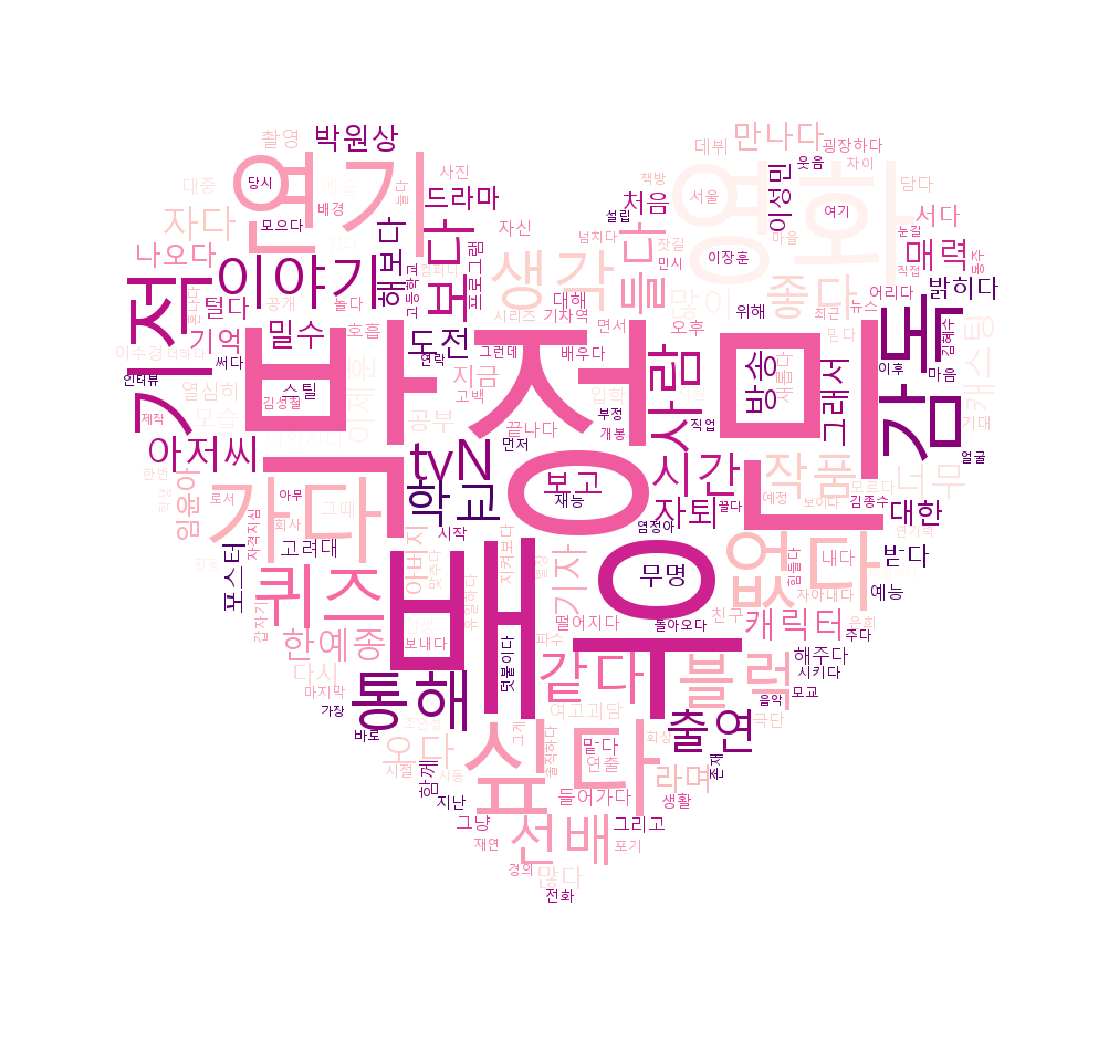

In [44]:
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, 
                       mask=cloud_shape, # "마스크를 씌운다"라고 표현합니다. (masking)
                       background_color='white',
                       colormap='RdPu').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

 마스킹 적용 - 해당 그림 색상으로 색상 통일

![image](image/wordcloud3.jpg)

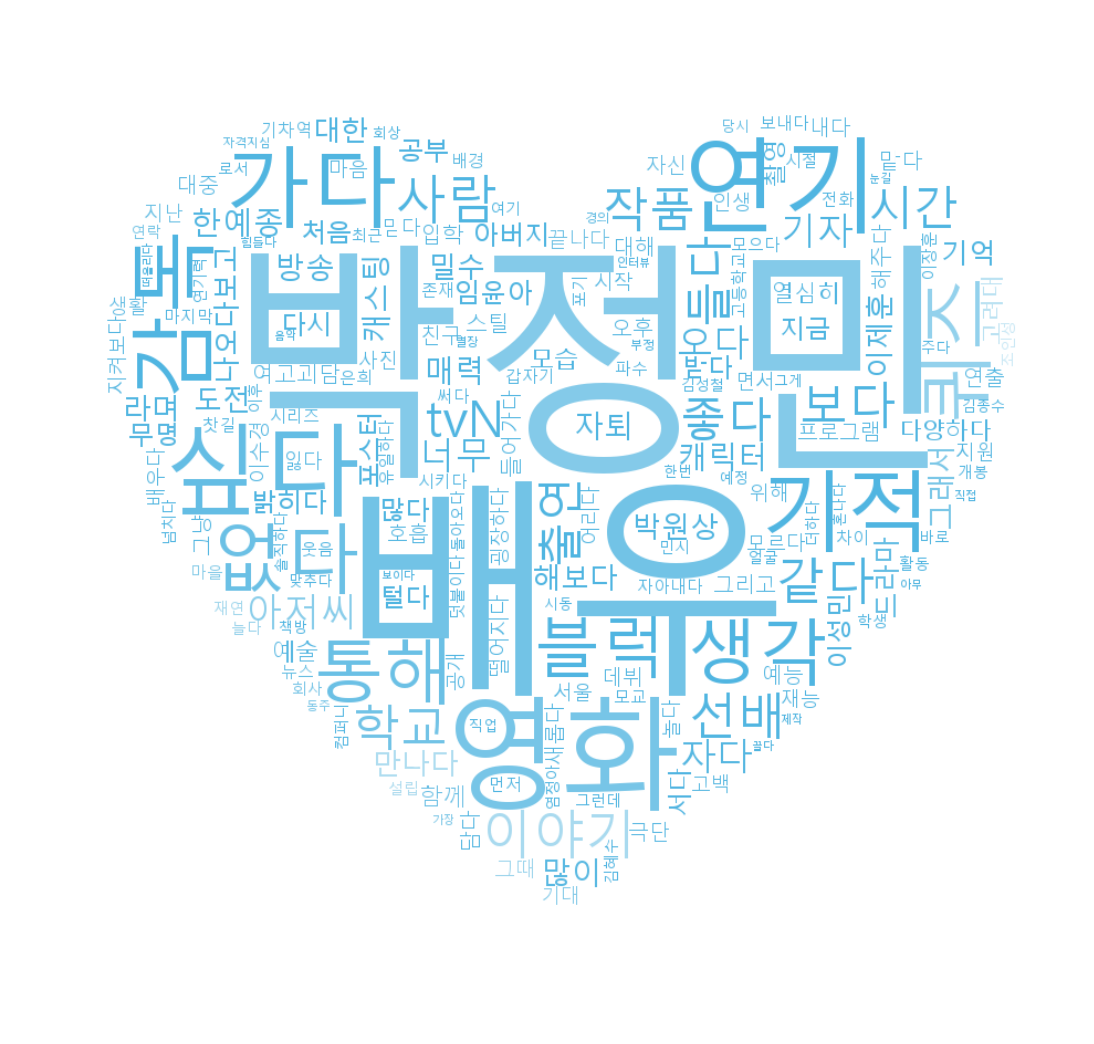

In [57]:
from wordcloud import ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.

cloud_shape = np.array(Image.open("image/wordcloud3.jpg"))
image_colors = ImageColorGenerator(cloud_shape)

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000,  
                       mask=cloud_shape, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))

plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
# plt.imshow(word_cloud.recolor(colormap='Blues'), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)

plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

워드클라우드 이미지파일로 저장하기

In [58]:
word_cloud.to_file('word_cloud_heart.png')